# Exploratory Data Analysis on Zomato Dataset

#### Importing the libraries

In [1]:
#import the warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

### Data cleaning :

##### Read the dataset

In [3]:
df = pd.read_csv(r'C:\Users\Srilathaa Vasu\Jupyter Notebooks\Exploratory Data Analysis\zomato dataset\zomato.csv',encoding='latin-1')

In [4]:
#Print the head of the data frame.
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [6]:
df.shape

(9551, 21)

In [7]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [8]:
df_country = pd.read_excel('zomato dataset\Country-Code.xlsx')
df_country.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


##### Merging the data frames

In [9]:
final_df = pd.merge(df,df_country,on='Country Code',how='left')
final_df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


### Fixing the rows and columns

In [10]:
list(final_df.columns)

['Restaurant ID',
 'Restaurant Name',
 'Country Code',
 'City',
 'Address',
 'Locality',
 'Locality Verbose',
 'Longitude',
 'Latitude',
 'Cuisines',
 'Average Cost for two',
 'Currency',
 'Has Table booking',
 'Has Online delivery',
 'Is delivering now',
 'Switch to order menu',
 'Price range',
 'Aggregate rating',
 'Rating color',
 'Rating text',
 'Votes',
 'Country']

In [11]:
#Removing all the unwanted/unneccesary columns from the dataset
del_col = ['Locality Verbose','Address','Country Code']

In [12]:
final_df.drop(del_col,axis=1,inplace=True)

### Analysing dataset

### Impute/Remove the missing values

In [13]:
#Counting the missing values
final_df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
City                    0
Locality                0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

<AxesSubplot:>

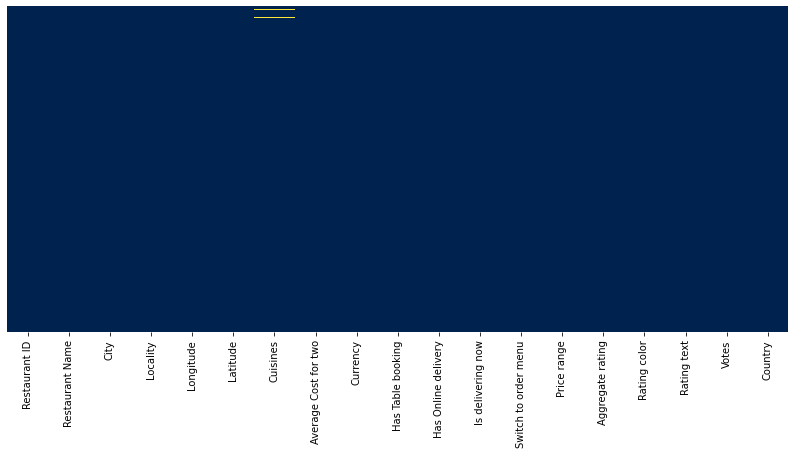

In [14]:
#heatmap to visualise the null values
plt.figure(figsize=[14,6])
sns.heatmap(final_df.isnull(),yticklabels=False,cbar=False,cmap='cividis')

In [15]:
country_count = final_df['Country'].value_counts()
country_names = final_df['Country'].value_counts().index

([<matplotlib.patches.Wedge at 0x18a67bdeca0>,
 [Text(-1.0829742700952103, 0.19278674827836725, 'India'),
  Text(1.077281715838356, -0.22240527134123297, 'United States'),
  Text(1.0995865153823035, -0.03015783794312073, 'United Kingdom')],
 [Text(-0.590713238233751, 0.10515640815183668, '94.39%'),
  Text(0.5876082086391032, -0.12131196618612707, '4.73%'),
  Text(0.5997744629358018, -0.01644972978715676, '0.87%')])

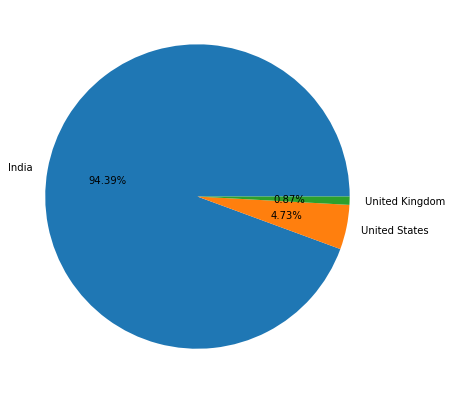

In [16]:
## Pie Chart- Top 3 countries that uses zomato
plt.figure(figsize=[7,7])
plt.pie(country_count[:3],labels=country_names[:3],autopct='%1.2f%%')

* From the pie chart, we can observe that Zomato records maximum transactions from India, followed by United States and United Kingdom.

In [17]:
ratings = final_df.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns={0:'Ratings Count'})
ratings

,Aggregate rating,Rating color,Rating text,Ratings Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


* When Rating is between 4.5 to 4.9 ---> Excellent
* When Rating is between 4.0 to 3.4 ---> Very good
* When Rating is between 3.5 to 3.9 ---> Good
* When Rating is between 3.0 to 3.4 ---> Average
* When Rating is between 2.5 to 2.9 ---> Average
* When Rating is between 2.0 to 2.4 ---> Poor

<AxesSubplot:xlabel='Aggregate rating', ylabel='Ratings Count'>

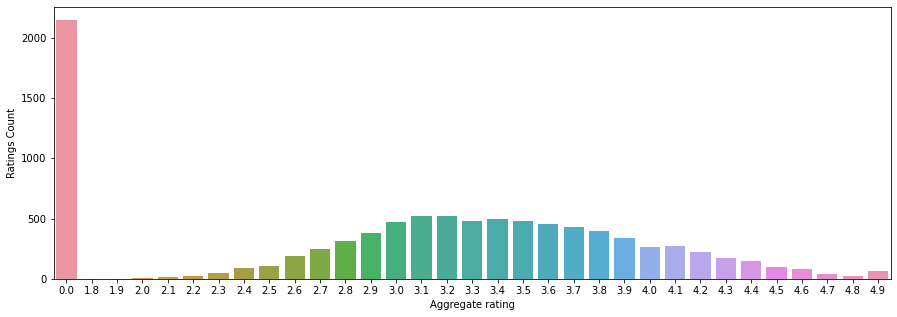

In [18]:
#plot to visualize aggregare ratings
plt.figure(figsize=[15,5])
sns.barplot(x='Aggregate rating',y='Ratings Count',data=ratings)

<AxesSubplot:xlabel='Aggregate rating', ylabel='Ratings Count'>

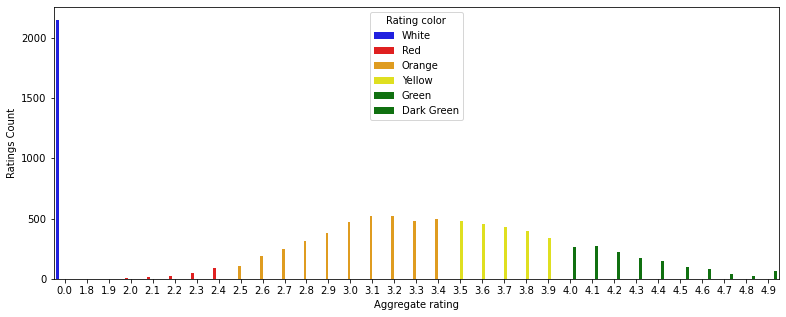

In [19]:
plt.figure(figsize=[13,5])
sns.barplot(x="Aggregate rating",y="Ratings Count",hue='Rating color',data=ratings,palette=['blue','red','orange','yellow','green','green'])

* Maximum ratings are between 2.5 and 3.9
* Majority of the people haven't submitted the ratings.

###### Rating Color

<AxesSubplot:xlabel='Rating color', ylabel='count'>

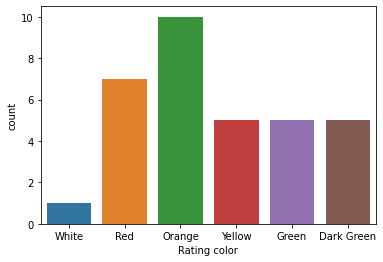

In [20]:
#Count plot
sns.countplot(x='Rating color',data=ratings)

##### Countries

In [21]:
final_df.groupby(['Aggregate rating','Country']).size().reset_index().sort_values(by='Aggregate rating',ascending=True).head()

,Aggregate rating,Country,0
0,0.0,Brazil,5
1,0.0,India,2139
2,0.0,United Kingdom,1
3,0.0,United States,3
4,1.8,India,1


<AxesSubplot:xlabel='Country'>

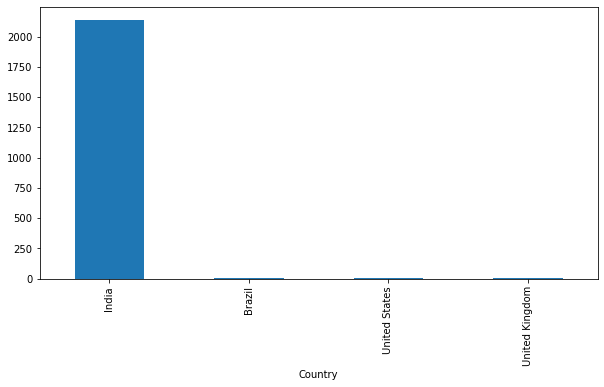

In [22]:
# no rating
plt.figure(figsize=[10,5])
final_df[final_df['Rating color']=='White'].groupby('Country').size().sort_values(ascending=False).plot(kind='bar')

* From the above table we can observe that maximum zero ratings are provided by Indian customers.

In [23]:
final_df.groupby(['Aggregate rating','Country']).size().reset_index().sort_values(by='Aggregate rating',ascending=False).head(15)

,Aggregate rating,Country,0
221,4.9,United States,14
215,4.9,Qatar,1
211,4.9,India,19
212,4.9,Indonesia,4
213,4.9,New Zealand,2
214,4.9,Phillipines,3
210,4.9,Brazil,3
216,4.9,South Africa,3
217,4.9,Sri Lanka,1
218,4.9,Turkey,3


<AxesSubplot:xlabel='Country'>

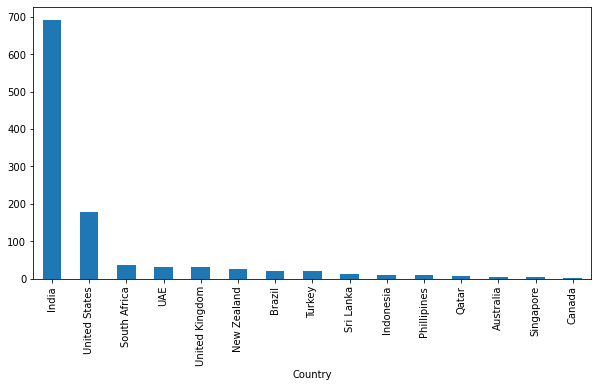

In [24]:
plt.figure(figsize=[10,5])
final_df[final_df['Rating color']=='Green'].groupby('Country').size().sort_values(ascending=False).plot(kind='bar')

##### Cuisines

<AxesSubplot:>

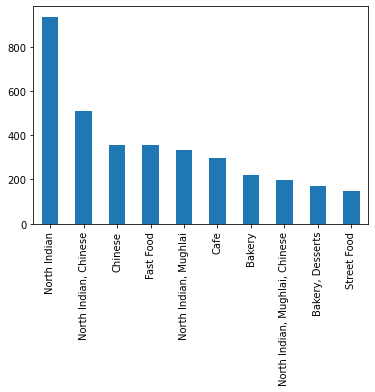

In [25]:
final_df['Cuisines'].value_counts().head(10).plot(kind='bar')

* From the table, we can observe that North Indian cuisines got maximum orders.

In [26]:
final_df[final_df['Has Online delivery'] =="Yes"]['Country'].value_counts()

India    2423
UAE        28
Name: Country, dtype: int64

In [27]:
final_df[['Has Online delivery','Country']].groupby(['Has Online delivery','Country']).size().reset_index()

,Has Online delivery,Country,0
0,No,Australia,24
1,No,Brazil,60
2,No,Canada,4
3,No,India,6229
4,No,Indonesia,21
5,No,New Zealand,40
6,No,Phillipines,22
7,No,Qatar,20
8,No,Singapore,20
9,No,South Africa,60


* Online deliveries are available in India and UAE only.

In [28]:
final_df['City'].value_counts().head()

New Delhi    5473
Gurgaon      1118
Noida        1080
Faridabad     251
Ghaziabad      25
Name: City, dtype: int64

In [29]:
city_values=final_df['City'].value_counts().values
city_labels=final_df['City'].value_counts().index

([<matplotlib.patches.Wedge at 0x18a68830670>,
 [Text(-0.6145352824185932, 0.9123301960708633, 'New Delhi'),
  Text(0.0623675251198054, -1.0982305276263407, 'Gurgaon'),
  Text(0.8789045225625368, -0.6614581167535246, 'Noida'),
  Text(1.0922218418223437, -0.13058119407559224, 'Faridabad'),
  Text(1.099946280005612, -0.010871113182029924, 'Ghaziabad')],
 [Text(-0.3352010631374145, 0.497634652402289, '68.87%'),
  Text(0.0340186500653484, -0.5990348332507311, '14.07%'),
  Text(0.47940246685229276, -0.36079533641101336, '13.59%'),
  Text(0.5957573682667329, -0.07122610585941394, '3.16%'),
  Text(0.5999706981848791, -0.005929698099289049, '0.31%')])

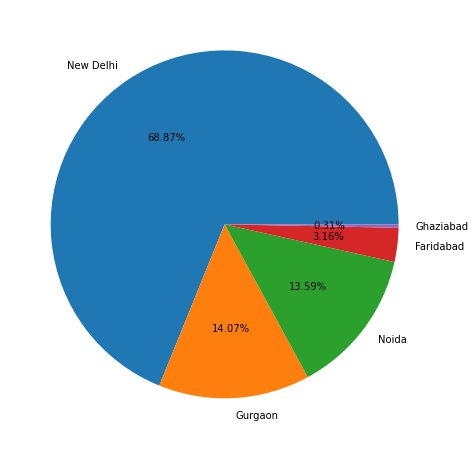

In [30]:
plt.figure(figsize=[12,8])
plt.pie(city_values[:5],labels=city_labels[:5],autopct='%1.2f%%')

* In India, maximum orders are recorded in New Delhi. <br>

##### Online Order Facility

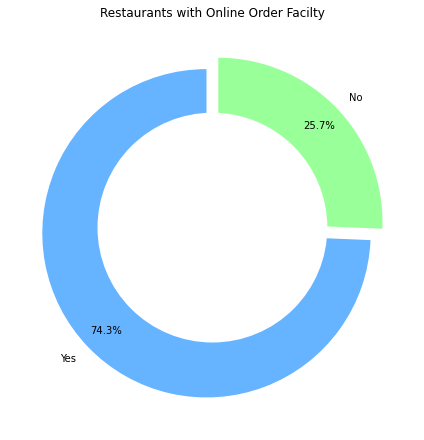

In [31]:
labels = ['Yes','No']
colors = ['#66b3ff','#99ff99']
explode = (0.05,0.05)

plt.figure(figsize=(6,6))
plt.pie(final_df['Has Online delivery'].value_counts(),colors = colors,autopct='%1.1f%%',labels=labels,startangle=90, pctdistance=0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle) 
plt.tight_layout() 
plt.title("Restaurants with Online Order Facilty")
plt.show()

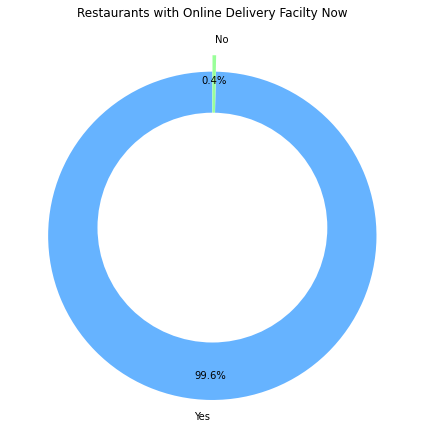

In [32]:
labels = ['Yes','No']
colors = ['#66b3ff','#99ff99']
explode = (0.05,0.05)

plt.figure(figsize=(6,6))
plt.pie(final_df['Is delivering now'].value_counts(),colors = colors,autopct='%1.1f%%',labels=labels,startangle=90, pctdistance=0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle) 
plt.tight_layout() 
plt.title("Restaurants with Online Delivery Facilty Now")
plt.show()

* We can observe that 74% restaurants have online order facilty which is very important in a fast paced life and also due to the food delivery apps.
* We can also see that nearly 99.6% of the restaurants are still having online delivery facility which is necessary.

##### Table Booking Facilty

Text(0.5, 1.0, 'Restaurants with Table Booking Facilty')

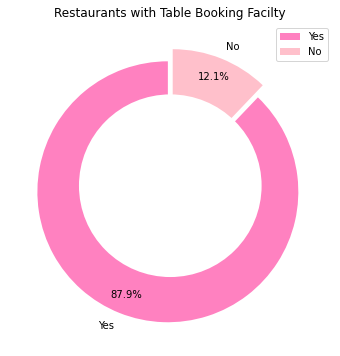

In [33]:
labels = ['Yes','No']
colors = ['#ff81c0','#ffc0cb']
explode = (0.05,0.05)

plt.figure(figsize=(6,6))
plt.pie(final_df['Has Table booking'].value_counts(),colors = colors,autopct='%1.1f%%',labels=labels,startangle=90, pctdistance=0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle) 
plt.legend()
plt.title("Restaurants with Table Booking Facilty")

* We can see that 88% restaurants have a table booking facilty due to rush at peak hours.

##### Rating vs Online order

Text(0, 0.5, 'Rating')

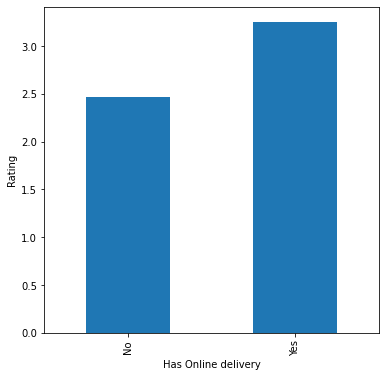

In [34]:
plt.figure(figsize=(6,6))
final_df.groupby('Has Online delivery')['Aggregate rating'].mean().plot.bar()
plt.ylabel('Rating')

* We can observe that online delivery facility has an impact on ratings. Ratings are high for restaurants having online delivery.

##### Rating vs Table Booking

Text(0, 0.5, 'Rating')

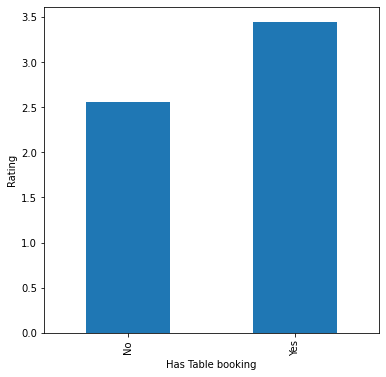

In [35]:
plt.figure(figsize=(6,6))
final_df.groupby('Has Table booking')['Aggregate rating'].mean().plot.bar()
plt.ylabel('Rating')

* Restaurants with table booking facility have higher ratings.